## Result Analysis

In [62]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.image as mpimg
import os

### Three datasets with different text instances
result1 = 3500 images, approx 100 text per images  
result2 = 5000 images, density 2, approx 50 text per images  
result3 = 5000 images, density 4, approx 25 text per images

In [24]:
result1 = pd.read_csv('runs/detect/train_3.5k_100/results.csv')
result2 = pd.read_csv('runs/detect/train_5k_2/results.csv')
result3 = pd.read_csv('runs/detect/train_5k_4/results.csv')

result1.columns = map(str.strip,result1.columns)
result2.columns = map(str.strip,result2.columns)
result3.columns = map(str.strip,result3.columns)

### Plot training evaluation

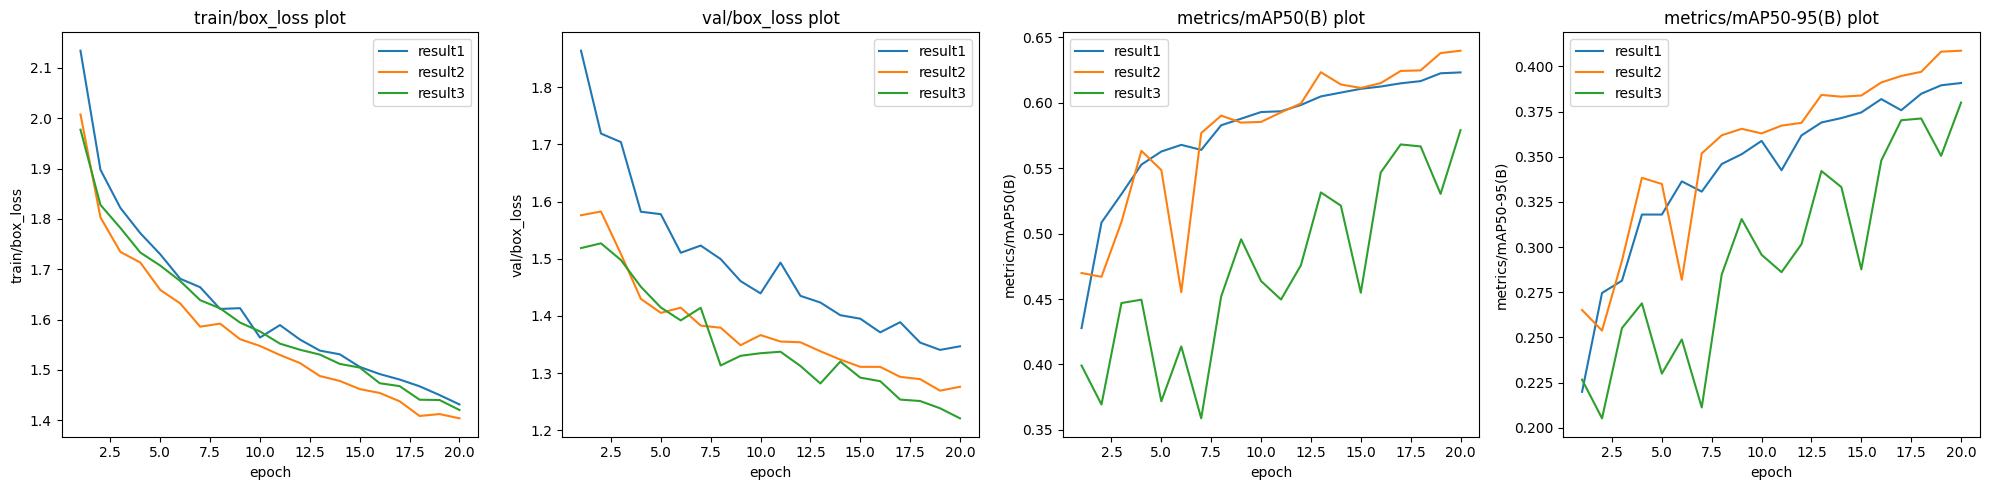

In [49]:
def plot_loss(x,y,ax,title):
    sns.lineplot(data=result1, x=x, y=y, ax=ax, label='result1')
    sns.lineplot(data=result2, x=x, y=y, ax=ax, label='result2')
    sns.lineplot(data=result3, x=x, y=y, ax=ax, label='result3')

    ax.set_title(title)

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

columns = ['train/box_loss','val/box_loss','metrics/mAP50(B)','metrics/mAP50-95(B)']
for axes, cols in zip(ax,columns):
    plot_loss('epoch', cols, axes, cols +' plot')

plt.tight_layout()
plt.show()

- The **box loss** for both training and validation has not reached a **plateau**, suggesting that further training epochs could lead to additional **reductions**.
- The **validation box loss** is lower for datasets with **fewer text instances**, indicating a potential correlation between dataset characteristics and model performance.
- The **mAP** for both 50% IoU and the 50%-95% IoU range exhibits similar trends, with **result2** achieving the highest performance.

### Plot F1 and PR-Curve plot

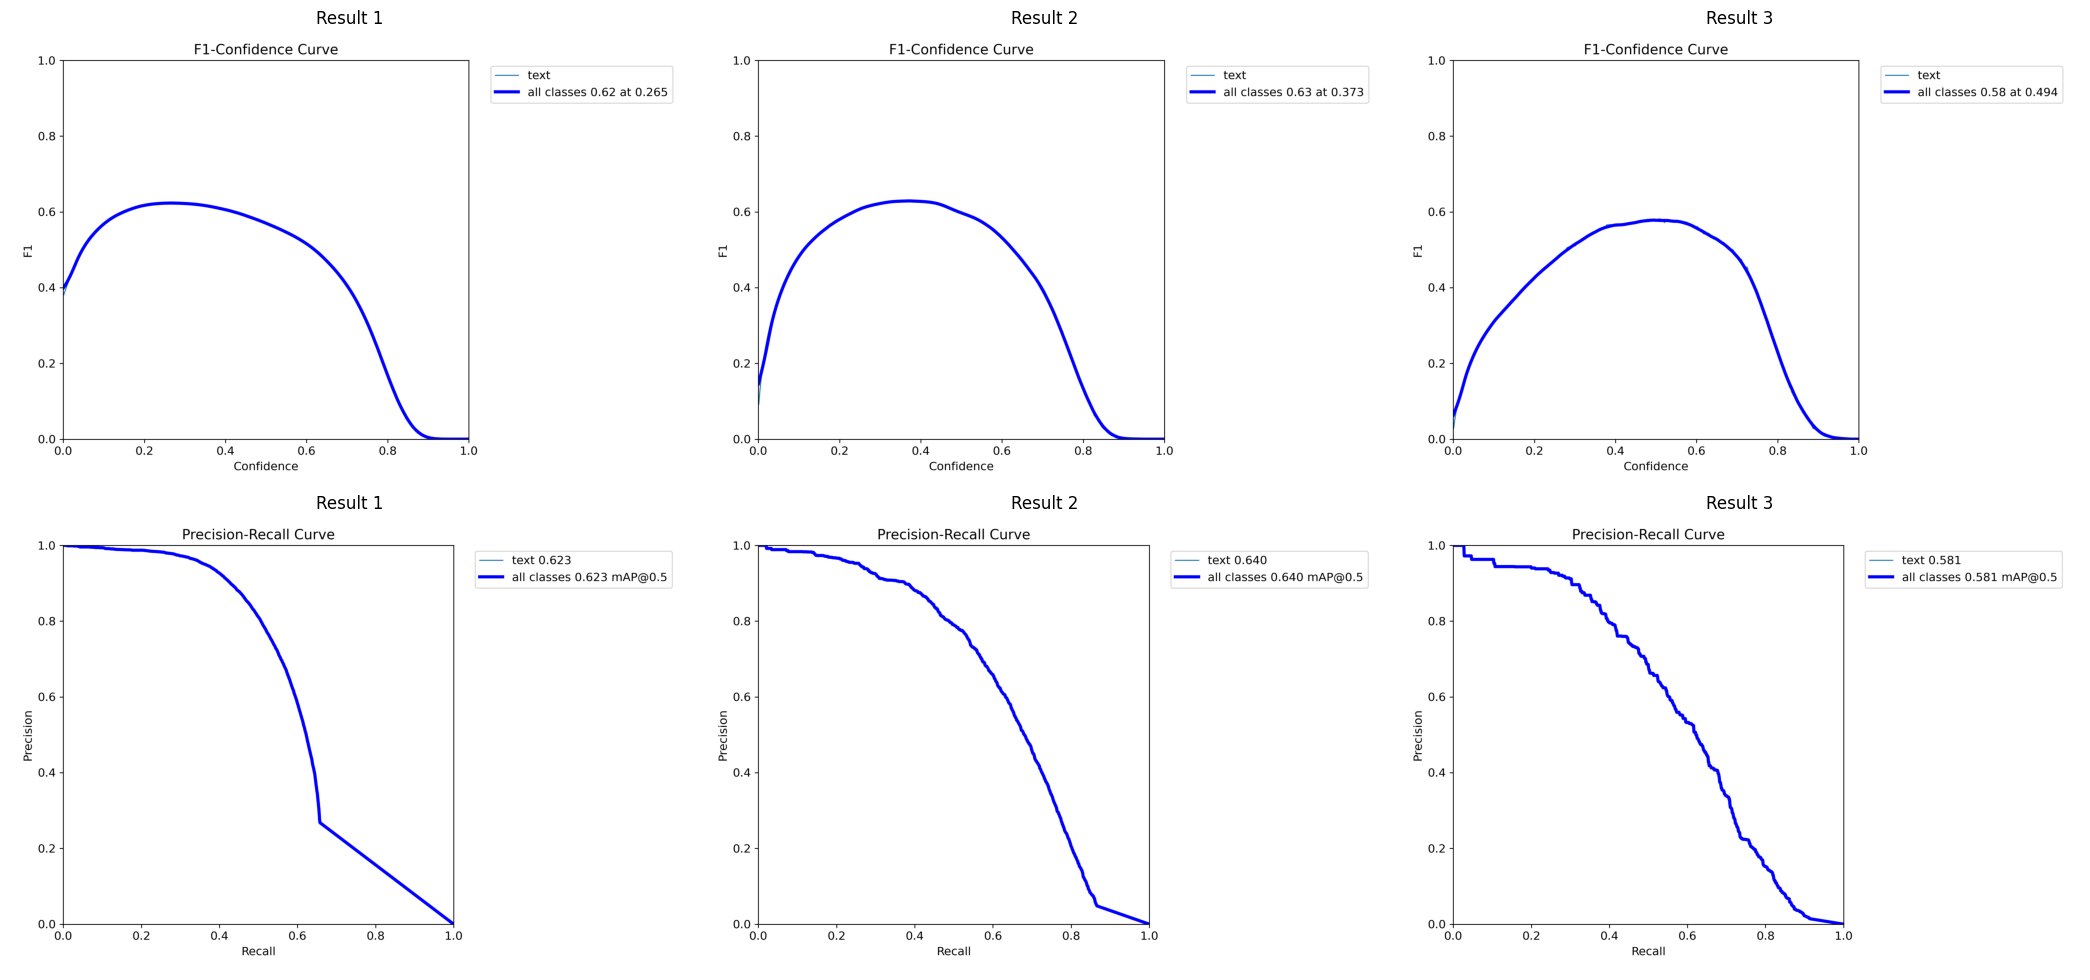

In [60]:
base_path = 'runs\\detect'

subdirectories = ['train_3.5k_100', 'train_5k_2', 'train_5k_4']

image_paths = [os.path.join(base_path, subdir, 'F1_curve.png') for subdir in subdirectories] + \
              [os.path.join(base_path, subdir, 'PR_curve.png') for subdir in subdirectories]

num_images = len(image_paths)
num_rows = 2
num_cols = num_images // num_rows + (num_images % num_rows > 0)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 7, num_rows * 5))

for i, path in enumerate(image_paths):
    img = mpimg.imread(path)
    axs[i // num_cols, i % num_cols].imshow(img)
    axs[i // num_cols, i % num_cols].axis('off')
    axs[i // num_cols, i % num_cols].set_title(f'Result {i % (num_images // 2) + 1}')

plt.tight_layout()
plt.show()

- The **F1-Confidence** plot illustrates the relationship between the F1 score and various confidence thresholds. **Result2** exhibits the highest peak F1 Score, reaching **0.63** at a confidence threshold of **0.373**.
- The **PR-Curve** depicts the relationship between Precision and Recall, with the **mAP** calculated as the area under the curve. **Result2** shows the largest **mAP** value for an IoU at **50%**, reaching **0.64**.

From above analysis we can conclude that **result2** have better performance. We will use the model to predict a street view in Jakarta.

In [65]:
from ultralytics import YOLO
import cv2

In [66]:
model = YOLO('runs/detect/train_5k_2/weights/best.pt')
results = model(source='street.mp4', show=True, save=True, conf=0.373)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/1406) d:\Projects\YOLOv8 Scene Text Detection\street.mp4: 384x640 5 texts, 34.7ms
video 1/1 (2/1406) d:\Projects\YOLOv8 Scene Text Detection\street.mp4: 384x640 4 texts, 34.0ms
video 1/1 (3/1406) d:\Projects\YOLOv8 Scene Text Detection\street.mp4: 384x640 3 texts, 34.0ms
video 1/1 (4/1406) d:\Projects\YOLOv8 Scene Text Detection\street.mp4: 384x640 2 texts, 33.0ms
video 1/1 (5/1406) d:\Projects\YOLOv8 Scene Text Detection\street.mp4: 384x6

: 